# Customer Attrition Prediction

In this project I compare the predictive performance of various machine learning classifiers when it comes to predicting customer attrition for a bank's credit card services. The 'Credit Card customers' dataset has been obtained through Kaggle and can be found here:
https://www.kaggle.com/sakshigoyal7/credit-card-customers

The workflow is as follows:
- Import packages and load in the data
- Explore and gain an understanding of the data through visualizations
- Preprocess the data to make it ready for the modeling phase (handling missing values, normalization, train-test split)
- Train and test the classifiers (logistic regression, decision tree, k-nn, naive Bayes, SVM, random forest, XGBoost)
- Interpret the results

## Import packages and load in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid", {'axes.facecolor': '#d9d9d9', 'figure.facecolor': 'None'})
pd.set_option('display.max_colwidth', None)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.2)

RANDOM_SEED = 7

In [2]:
churn = pd.read_csv("BankChurners.csv")

In [3]:
# The dataset description states that the last two rows should be deleted
churn = churn.iloc[:,:-2]

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

The following metadata is available on our features:
- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age: Demographic variable - Customer's Age in Years
- Gender: Demographic variable - M=Male, F=Female
- Dependent_count: Demographic variable - Number of dependents
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
- Income_Category: Demographic variable - Annual Income Category of the account holder
- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio

In [5]:
churn.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Visualization

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


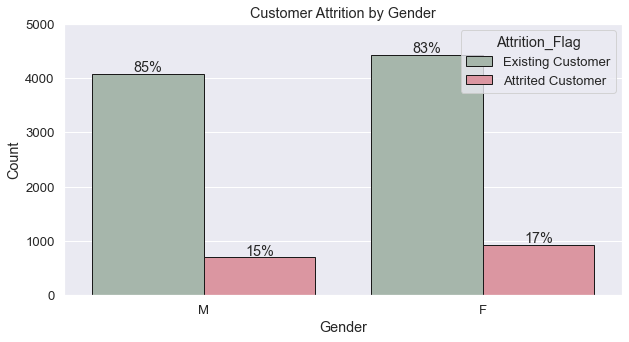

In [6]:
ax = sns.countplot("Gender", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k')  
ax.set_ylabel('Count')
ax.set_ylim(0,5000)
ax.set_title('Customer Attrition by Gender')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

No striking difference in attrition between men and women

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


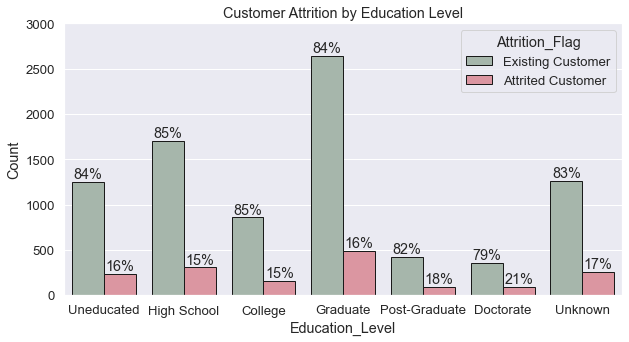

In [7]:
ax = sns.countplot("Education_Level", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k',
                  order = ["Uneducated","High School","College", "Graduate", "Post-Graduate", "Doctorate", "Unknown" ])
ax.set_ylabel('Count')
ax.set_ylim(0,3000)
ax.set_title('Customer Attrition by Education Level')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

No striking difference in attrition between education level, although customers with a doctorate do seem to churn more frequently relative to the other education levels

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


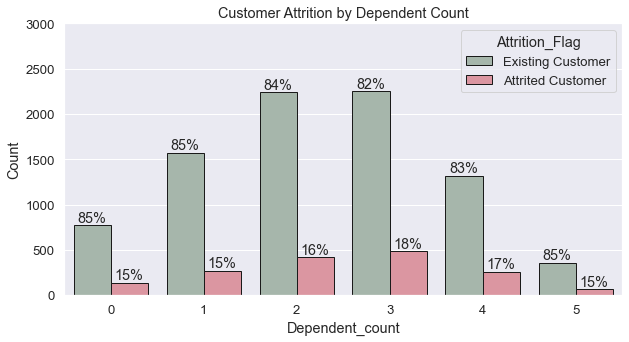

In [8]:
ax = sns.countplot("Dependent_count", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k')
ax.set_ylabel('Count')
ax.set_ylim(0,3000)
ax.set_title('Customer Attrition by Dependent Count')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

No striking difference in attrition between different numbers of dependents

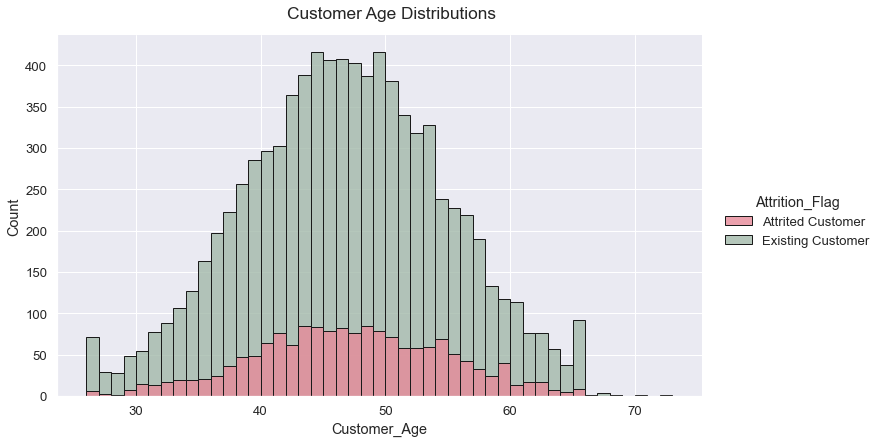

In [9]:
ax = sns.displot(x="Customer_Age", data = churn, hue="Attrition_Flag", height = 6, aspect=1.7,palette = ['#E68A99', '#A3B9AA'],
                  edgecolor = 'k', hue_order = ["Attrited Customer", "Existing Customer"], alpha = 0.8)
ax.fig.suptitle('Customer Age Distributions', x = 0.45, y = 1.03)
ax.fig.set_facecolor('None')

No striking difference in the distributions of customer age between attrited and existing customers

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


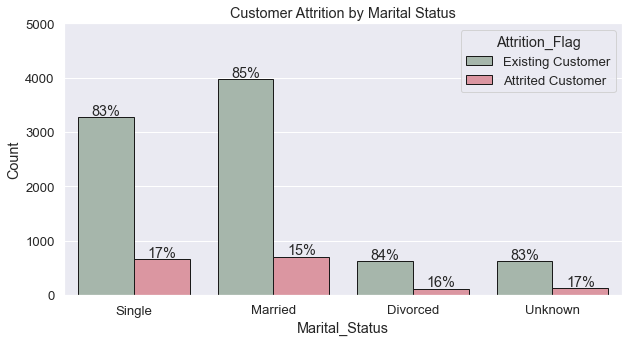

In [10]:
ax = sns.countplot("Marital_Status", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k',
                  order = ["Single", "Married", "Divorced", "Unknown"])
ax.set_ylabel('Count')
ax.set_ylim(0,5000)
ax.set_title('Customer Attrition by Marital Status')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

No striking difference in attrition between different marital statuses

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


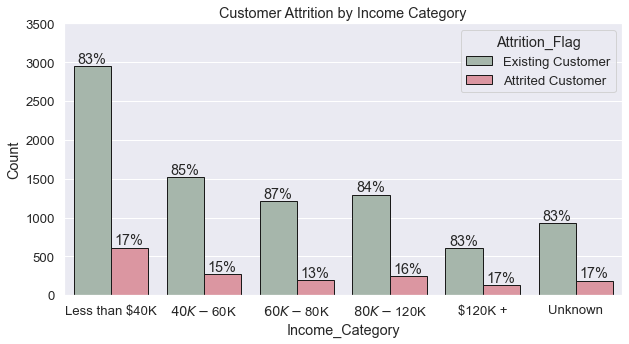

In [11]:
ax = sns.countplot("Income_Category", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k',
                  order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +", "Unknown"])
ax.set_ylabel('Count')
ax.set_ylim(0,3500)
ax.set_title('Customer Attrition by Income Category')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

No striking difference in attrition between different income statuses, except for a relatively low attrition rate within the 60-80k, while the attrition within the lowest and highest income brackets seem a bit higher

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


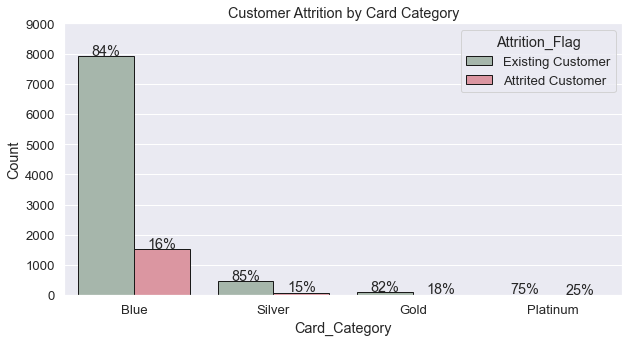

In [12]:
ax = sns.countplot("Card_Category", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k',
                  order = ["Blue", "Silver", "Gold", "Platinum"])
ax.set_ylabel('Count')
ax.set_ylim(0,9000)
ax.set_title('Customer Attrition by Card Category')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [13]:
churn["Card_Category"][churn['Card_Category'] == "Platinum"].count()

20

By far the most customers have a blue category card. The attrition rate among platinum card holders seems to be significantly higher. However, there are only 20 customers with such a card. So it's hard to draw any conclusions from this observation.

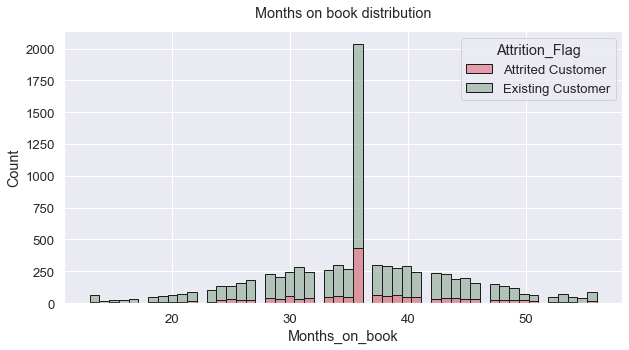

In [14]:
ax = sns.histplot(data = churn, x = "Months_on_book", hue = "Attrition_Flag",palette = ['#E68A99', '#A3B9AA'],
                  edgecolor = 'k', hue_order = ["Attrited Customer", "Existing Customer"], alpha = 0.8) 
ax.set_title('Months on book distribution', x = 0.5, y = 1.03)
ax.figure.set_facecolor('None')

In [15]:
len(churn[churn["Months_on_book"] == 36])

2463

The distributions of months on book between attrited and existing customers seem relatively similar. However, there is a disproportionate amount of customers with 36 months on book. The reason for this is unclear, but it might have to do with some kind of company or subscription policy.

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


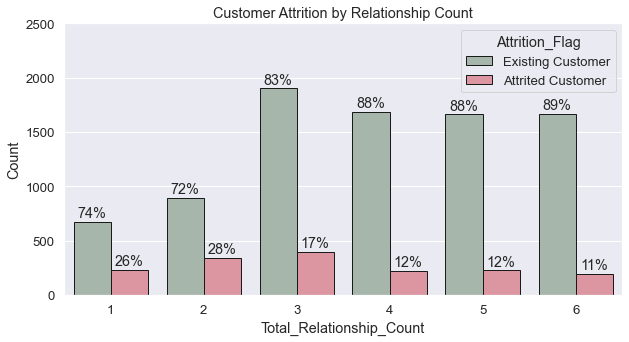

In [16]:
ax = sns.countplot("Total_Relationship_Count", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k')
ax.set_ylabel('Count')
ax.set_ylim(0,2500)
ax.set_title('Customer Attrition by Relationship Count')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

It appears that roughly the higher the relationship count (the total number of products held by the customer), the lower the attrition rate. This feature is likely to have significant predictive power

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


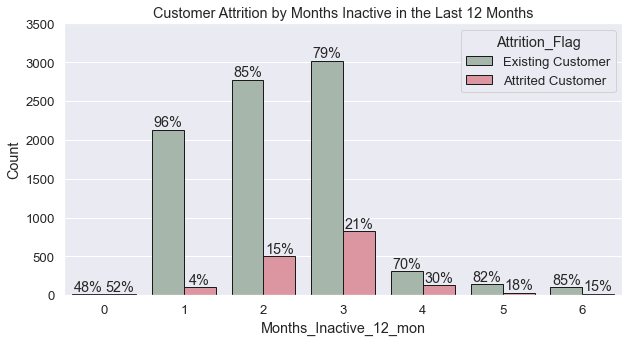

In [17]:
ax = sns.countplot("Months_Inactive_12_mon", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k')
ax.set_ylabel('Count')
ax.set_ylim(0,3500)
ax.set_title('Customer Attrition by Months Inactive in the Last 12 Months')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

This graphs shows that for customers who have been inactive for just a month in the last 12 months, the attrition rate is only 4%. However, inactivity for 3 or 4 months makes the attrition rate rise to 21% and 30% respectively. Therefore, the months inactive are likely to carry some predictive power.

C:\Coding\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


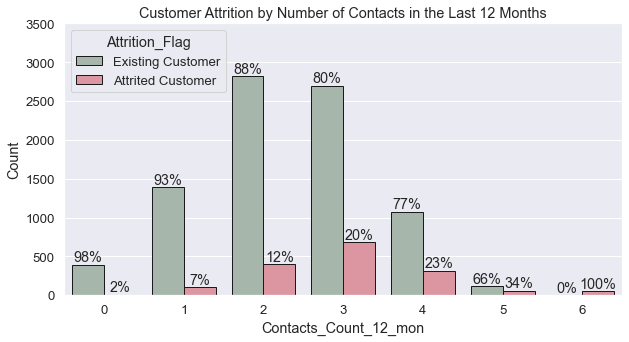

In [18]:
ax = sns.countplot("Contacts_Count_12_mon", data=churn, hue="Attrition_Flag", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k')
ax.set_ylabel('Count')
ax.set_ylim(0,3500)
ax.set_title('Customer Attrition by Number of Contacts in the Last 12 Months')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = np.nan_to_num(left.get_height())
    height_r = np.nan_to_num(right.get_height())
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

The higher the number of contacts in the last 12 months, the more likely it is for the customer to churn. This feature is therefore likely to carry predictive power as well.

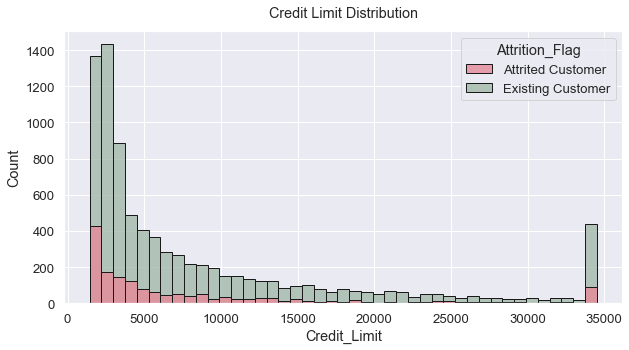

In [19]:
ax = sns.histplot(data = churn, x = "Credit_Limit", hue = "Attrition_Flag", palette = ['#E68A99', '#A3B9AA'],
                  edgecolor = 'k', hue_order = ["Attrited Customer", "Existing Customer"], alpha = 0.8) 
ax.set_title('Credit Limit Distribution', x = 0.5, y = 1.03)
ax.figure.set_facecolor('None')

The figure above shows an interesting spike between the 34k and 35k range. However, the distributions seem quite similar between the attrited and existing customer classes overall.

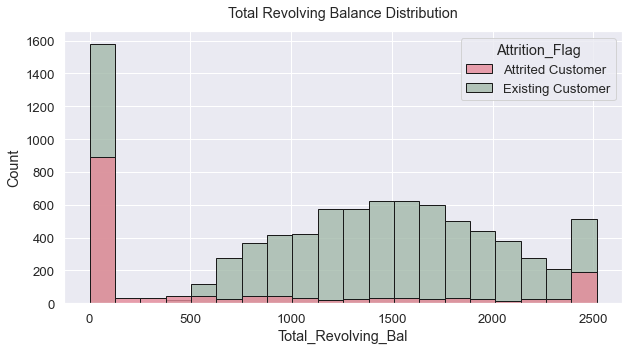

In [20]:
ax = sns.histplot(data = churn, x = "Total_Revolving_Bal", hue = "Attrition_Flag",palette = ['#E68A99', '#A3B9AA'],
                  edgecolor = 'k', hue_order = ["Attrited Customer", "Existing Customer"], alpha = 0.8) 
ax.set_title('Total Revolving Balance Distribution', x = 0.5, y = 1.03)
ax.figure.set_facecolor('None')

The distribution of the Attrited Customer class differs substantially from the Existing Customer distribution. There is a clear bell-shaped curve around a total revolving balance of 1500 for the existing customer distribution, which is almost completely absent in the distribution of the attrited customers. There are also major spikes on both ends of the distributions. This graph reveals the total revolving balance to be a potentially powerful predictor.

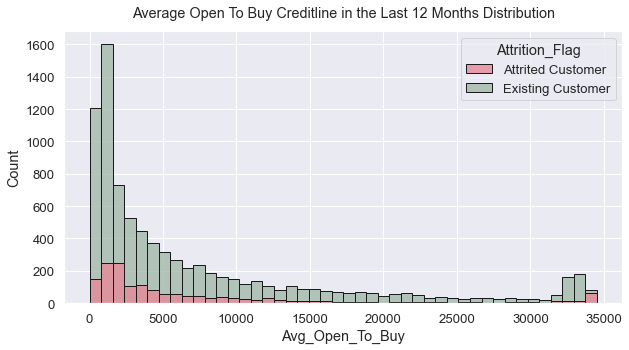

In [21]:
ax = sns.histplot(data = churn, x = "Avg_Open_To_Buy", hue = "Attrition_Flag", palette = ['#E68A99', '#A3B9AA'],
                  edgecolor = 'k', hue_order = ["Attrited Customer", "Existing Customer"], alpha = 0.8) 
ax.set_title('Average Open To Buy Creditline in the Last 12 Months Distribution', x = 0.5, y = 1.03)
ax.figure.set_facecolor('None')

The distributions of both classes seem relatively similar on first glance, albeit with some minor differences especially near the tail end of the distributions.

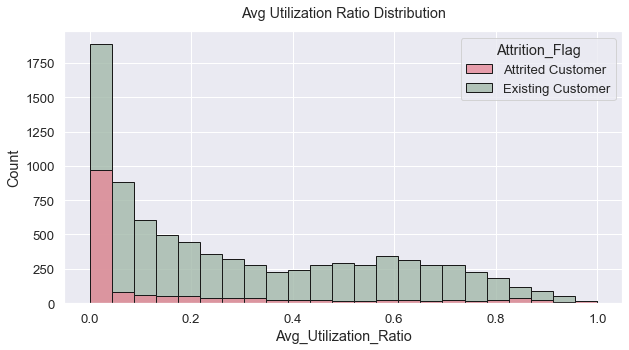

In [22]:
ax = sns.histplot(data = churn, x = "Avg_Utilization_Ratio", hue = "Attrition_Flag", palette = ['#E68A99', '#A3B9AA'],
                  edgecolor = 'k', hue_order = ["Attrited Customer", "Existing Customer"], alpha = 0.8) 
ax.set_title('Avg Utilization Ratio Distribution', x = 0.5, y = 1.03)
ax.figure.set_facecolor('None')

The distributions also seem relatively similar here, but there is a relatively large proportion of attrited customers in the first bin.

C:\Coding\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


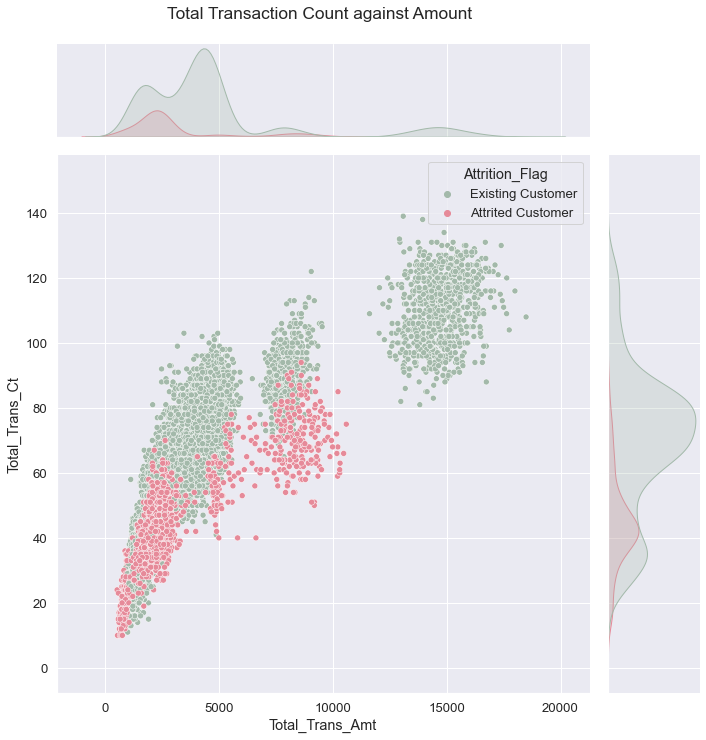

In [23]:
ax = sns.jointplot(x="Total_Trans_Amt",y = "Total_Trans_Ct", data = churn, hue="Attrition_Flag",
            palette = ['#A3B9AA','#E68A99'], size= 10, kind = 'scatter')
ax.fig.suptitle('Total Transaction Count against Amount', x = 0.45, y = 1.03)
ax.fig.set_facecolor('None')

The scatterplot and distributions above indicate that existing customers tend to have a higher total transaction amount and count on average than the attrited customers

C:\Coding\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


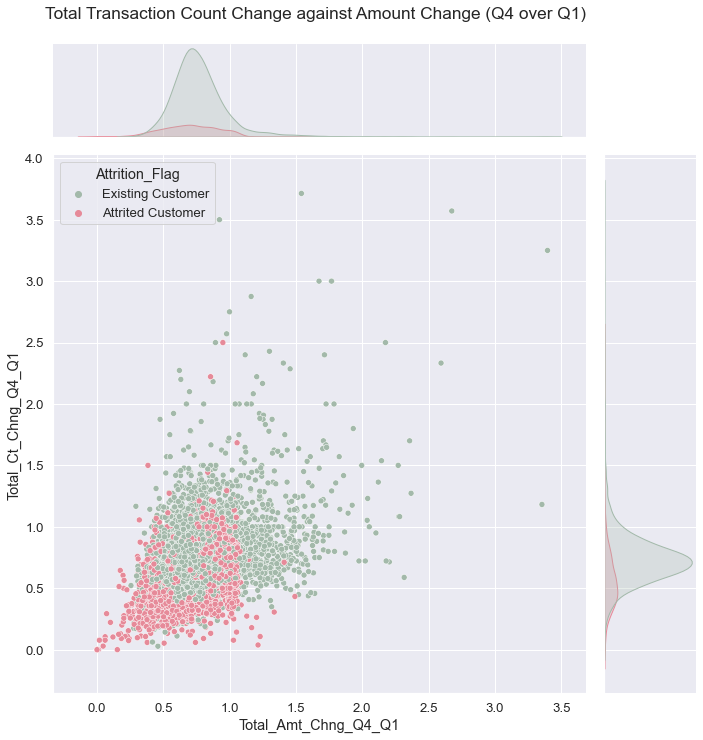

In [24]:
ax = sns.jointplot(x="Total_Amt_Chng_Q4_Q1",y = "Total_Ct_Chng_Q4_Q1", data = churn, hue="Attrition_Flag",
            palette = ['#A3B9AA','#E68A99'], size= 10, kind = 'scatter')
ax.fig.suptitle('Total Transaction Count Change against Amount Change (Q4 over Q1)', x = 0.45, y = 1.03)
ax.fig.set_facecolor('None')

The scatterplot and distributions above indicate that existing customers tend to have a higher total transaction amount change between Q4 and Q1 on average than the attrited customers. In terms of total count change the distinction seems a bit less clear cut.

## Data Processing

In [25]:
import imblearn
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#### Identifying and processing missing values

In [26]:
churn[churn == "Unknown"] = np.nan
churn.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

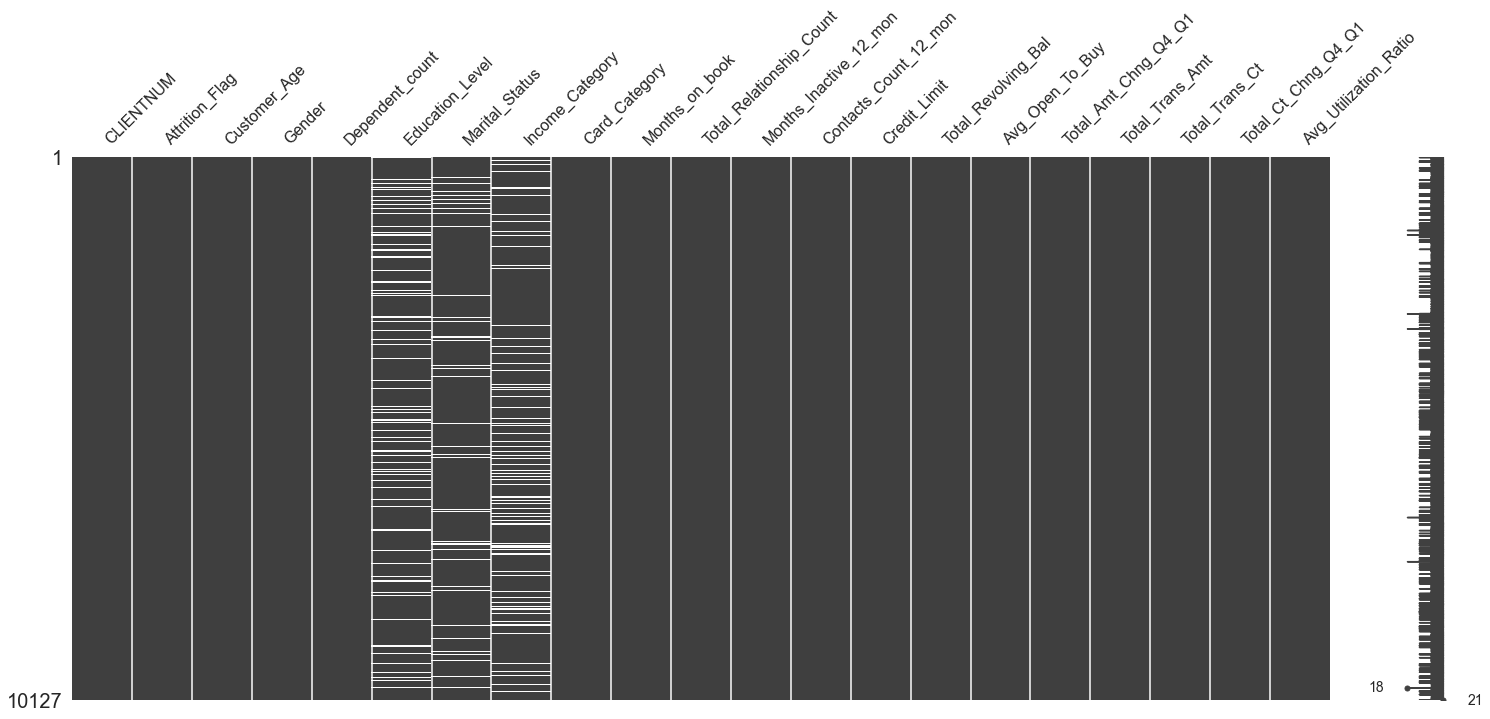

In [27]:
mat = msno.matrix(churn)
mat.figure.set_facecolor('None')

Since we are dealing with categorical features, we choose to impute the missing values with the mode (the most observed value) of the specific features.

In [29]:
churn["Marital_Status"] = churn["Marital_Status"].fillna(churn.Marital_Status.mode()[0])
churn["Education_Level"] = churn["Education_Level"].fillna(churn.Education_Level.mode()[0])
churn["Income_Category"] = churn["Income_Category"].fillna(churn.Income_Category.mode()[0])

#### Transform the categorical variables into dummy variables

In [30]:
churn = churn.join([pd.get_dummies(churn["Gender"], drop_first = True),
                   pd.get_dummies(churn["Education_Level"], drop_first = True, prefix = "Edu"),
                   pd.get_dummies(churn["Marital_Status"], drop_first = True, prefix = "Mar"),
                   pd.get_dummies(churn["Income_Category"], drop_first = True, prefix = "Inc"),
                   pd.get_dummies(churn["Card_Category"], drop_first = True, prefix = "Card"),
                   pd.get_dummies(churn["Attrition_Flag"])])

In [31]:
churn = churn.drop(["Attrition_Flag", "Gender", "Education_Level", "Marital_Status","Income_Category", "Card_Category", "Existing Customer"], axis = 1)

In [32]:
churn

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Mar_Married,Mar_Single,Inc_$40K - $60K,Inc_$60K - $80K,Inc_$80K - $120K,Inc_Less than $40K,Card_Gold,Card_Platinum,Card_Silver,Attrited Customer
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,1,0,0,0,0,0,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,1,0,0,0,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,1,0,0,0,1,0,0,0,0,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,0,1,0,0,0,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,1,1,0,0,0,0,0,0,0
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,1,0,0,0,0,0,0,1
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,0,1,0,0,0,1
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,...,1,0,1,0,0,0,0,0,0,1


#### Split the data into a training and test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    churn.loc[:,"Customer_Age":"Card_Silver"], churn["Attrited Customer"], test_size=0.33, random_state=7)

In [34]:
y_train.value_counts()

0    5673
1    1112
Name: Attrited Customer, dtype: int64

#### Normalization

In [35]:
scaler = preprocessing.StandardScaler()

In [36]:
X_train[['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']] = scaler.fit_transform(X_train[['Customer_Age','Dependent_count','Months_on_book',
                                                                                                          'Total_Relationship_Count', 'Months_Inactive_12_mon',
                                                                                                          'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                                                                                                          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                                                                                          'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])

X_test[['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']] = scaler.transform(X_test[['Customer_Age','Dependent_count','Months_on_book',
                                                                                                     'Total_Relationship_Count', 'Months_Inactive_12_mon',
                                                                                                     'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                                                                                                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                                                                                     'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])


##### Address class imbalance by oversampling the training data for algorithms that do not have a built-in method

In [37]:
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [38]:
y_train_os.value_counts()

0    5673
1    5673
Name: Attrited Customer, dtype: int64

## Modeling

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from xgboost import XGBClassifier
#from sklearn.inspection import permutation_importance

### Logistic Regression

In [40]:
clf = LogisticRegression()
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
param_grid = [
  {'class_weight': ['balanced'],
   'C': [1,10,100],
  'penalty': ['l1', 'l2'],
  'solver': ['lbfgs', 'liblinear', 'saga']}
 ]

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train_os, y_train_os)
print(clf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s


{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.4s finished


In [42]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred),"", sep="\n")
print("Classification Report:",classification_report(y_test,y_pred), sep="\n")

Confusion Matrix:
[[2539  288]
 [ 123  392]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2827
           1       0.58      0.76      0.66       515

    accuracy                           0.88      3342
   macro avg       0.77      0.83      0.79      3342
weighted avg       0.90      0.88      0.88      3342



In [43]:
lr_cm = confusion_matrix(y_test,y_pred)
lr_cr = classification_report(y_test,y_pred,output_dict=True)

### Decision Tree Classifier

In [44]:
clf = tree.DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [45]:
param_grid = [
  {'criterion': ["entropy", "gini"], 'max_depth': [2, 4, 8, 16, None],
  'min_samples_split':range(2,10), 'min_samples_leaf':range(1,5)}
 ]

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train_os, y_train_os)
print(clf.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    9.2s finished


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred),"", sep="\n")
print("Classification Report:",classification_report(y_test,y_pred), sep="\n")

Confusion Matrix:
[[2678  149]
 [  79  436]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2827
           1       0.75      0.85      0.79       515

    accuracy                           0.93      3342
   macro avg       0.86      0.90      0.88      3342
weighted avg       0.94      0.93      0.93      3342



In [47]:
tree_cm = confusion_matrix(y_test,y_pred)
tree_cr = classification_report(y_test,y_pred,output_dict=True)

### k-NN

In [48]:
clf = KNeighborsClassifier()
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [49]:
param_grid = {'n_neighbors': [3, 5, 11, 19],
             'weights': ['uniform', 'distance'],
             'metric':['euclidean', 'minkowski', 'manhattan']}

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train_os, y_train_os)
print(clf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.3s finished


In [50]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2549  278]
 [ 100  415]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2827
           1       0.60      0.81      0.69       515

    accuracy                           0.89      3342
   macro avg       0.78      0.85      0.81      3342
weighted avg       0.91      0.89      0.89      3342



In [51]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_cr = classification_report(y_test,y_pred,output_dict=True)

### Naive Bayes Classifier

In [52]:
clf = GaussianNB()
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [53]:
param_grid = {'var_smoothing': [1e-07,1e-08,1e-09,1e-10]}

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train_os, y_train_os)
print(clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'var_smoothing': 1e-07}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [54]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred),"", sep="\n")
print("Classification Report:",classification_report(y_test,y_pred), sep="\n")

Confusion Matrix:
[[1950  877]
 [ 148  367]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      2827
           1       0.30      0.71      0.42       515

    accuracy                           0.69      3342
   macro avg       0.61      0.70      0.60      3342
weighted avg       0.83      0.69      0.73      3342



In [55]:
nb_cm = confusion_matrix(y_test,y_pred)
nb_cr = classification_report(y_test,y_pred,output_dict=True)

### Support Vector Machine

In [56]:
clf = svm.SVC()
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
param_grid = {'C': [1,10,100],
              'class_weight': ['balanced'],
              'gamma': [1, 0.1, 0.01, 'scale'],
              'kernel': ['rbf', 'linear']}

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}


In [58]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred),"", sep="\n")
print("Classification Report:",classification_report(y_test,y_pred), sep="\n")

Confusion Matrix:
[[2715  112]
 [ 100  415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2827
           1       0.79      0.81      0.80       515

    accuracy                           0.94      3342
   macro avg       0.88      0.88      0.88      3342
weighted avg       0.94      0.94      0.94      3342



In [59]:
svm_cm = confusion_matrix(y_test,y_pred)
svm_cr = classification_report(y_test,y_pred,output_dict=True)

### Random Forest Classifier

In [60]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
param_grid = [
  {'bootstrap': [True, False], 'max_depth':[10, 50, 100, None],
   'max_features': ['auto', 'sqrt'], 'min_samples_leaf':[1,2,4], 
   'min_samples_split':[2, 5, 10], 'n_estimators': [100, 500, 1000],
   'class_weight': ['balanced']}
 ]

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 10.8min finished


{'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [62]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred),"", sep="\n")
print("Classification Report:",classification_report(y_test,y_pred), sep="\n")

Confusion Matrix:
[[2765   62]
 [  63  452]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2827
           1       0.88      0.88      0.88       515

    accuracy                           0.96      3342
   macro avg       0.93      0.93      0.93      3342
weighted avg       0.96      0.96      0.96      3342



In [63]:
rf_cm = confusion_matrix(y_test,y_pred)
rf_cr = classification_report(y_test,y_pred,output_dict=True)

### XGBoost Classifier

In [64]:
clf = XGBClassifier()
clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [65]:
scale_num = int(y_train.value_counts().values[0]/y_train.value_counts().values[1])
scale_num

5

In [66]:
param_grid = [
  {'use_label_encoder': [False],
   'scale_pos_weight': [scale_num],
   'booster': ['gbtree'],
   'max_depth':[3, 6, 10],
   'min_child_weight': [1, 3, 5],
   'gamma': [0, 0.1, 0.2],
   'n_estimators': [50, 100, 200],
   'tree_method': ['gpu_hist'],
   'predictor':['gpu_predictor']}
 ]

clf = GridSearchCV(clf,
                   param_grid = param_grid,
                   cv = 5,
                   verbose = 1,
                   n_jobs = -1)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.5min finished


[01:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'predictor': 'gpu_predictor', 'scale_pos_weight': 5, 'tree_method': 'gpu_hist', 'use_label_encoder': False}


In [67]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:",confusion_matrix(y_test,y_pred),"", sep="\n")
print("Classification Report:",classification_report(y_test,y_pred), sep="\n")

Confusion Matrix:
[[2777   50]
 [  42  473]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2827
           1       0.90      0.92      0.91       515

    accuracy                           0.97      3342
   macro avg       0.94      0.95      0.95      3342
weighted avg       0.97      0.97      0.97      3342



In [68]:
xgb_cm = confusion_matrix(y_test,y_pred)
xgb_cr = classification_report(y_test,y_pred,output_dict=True)

In [69]:
Importance = pd.DataFrame({"Importance": clf.best_estimator_.feature_importances_*100}, index = X_train.columns)

In [70]:
Importance_desc = Importance.sort_values(by = "Importance", axis = 0, ascending = False)

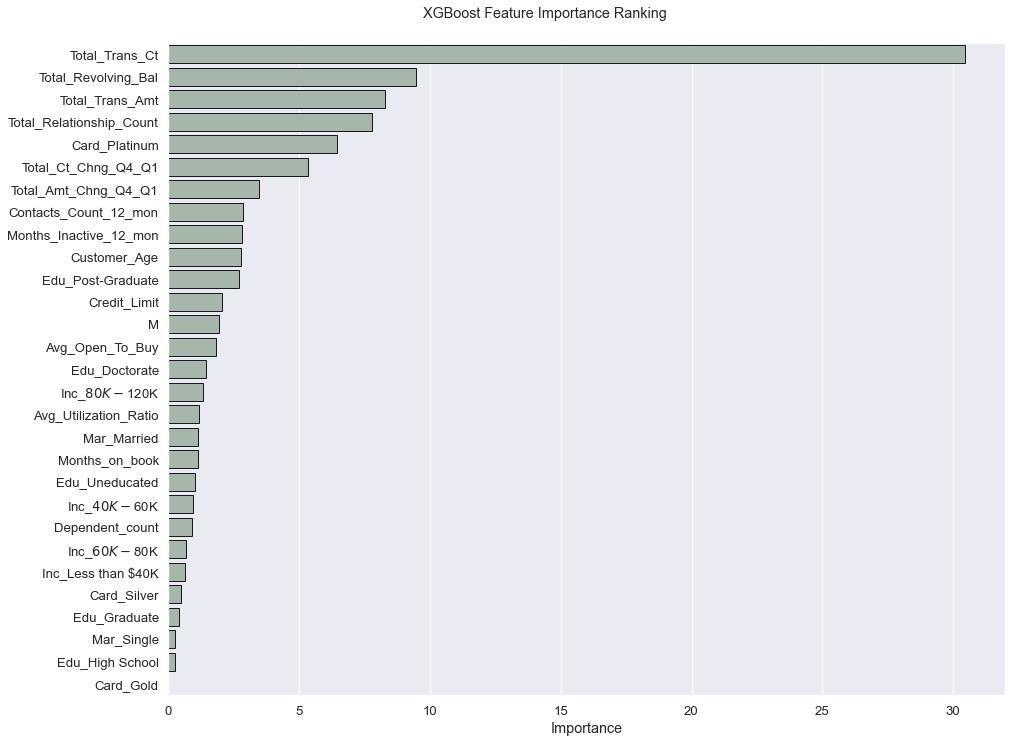

In [71]:
ax = sns.barplot(x = "Importance", y = Importance_desc.index, data = Importance_desc,color = '#A3B9AA', edgecolor = 'k')
ax.figure.set_size_inches(15, 12)
ax.set_title('XGBoost Feature Importance Ranking', x = 0.45, y = 1.03)
ax.figure.set_facecolor('None')

### Summarized Results

In [72]:
report = [tree_cr, knn_cr, nb_cr, svm_cr, rf_cr, xgb_cr]

In [93]:
results = pd.DataFrame(np.array([["Logistic Regression", lr_cr['1']['recall'], lr_cr['accuracy']],
                                 ["Decision Tree", tree_cr['1']['recall'], tree_cr['accuracy']],
                                 ["k-NN", knn_cr['1']['recall'], knn_cr['accuracy']],
                                 ["Naive Bayes", nb_cr['1']['recall'], nb_cr['accuracy']],
                                 ["SVM", svm_cr['1']['recall'], svm_cr['accuracy']],
                                 ["Random Forest", rf_cr['1']['recall'], rf_cr['accuracy']],
                                 ["XGBoost", xgb_cr['1']['recall'], xgb_cr['accuracy']]
                                ]), columns = ['Classifier','Recall', 'Accuracy'])

In [94]:
results["Accuracy"] = results["Accuracy"].astype('float64')
results["Recall"] = results["Recall"].astype('float64')

results = results.melt(id_vars='Classifier')
results = results.rename(columns={"variable": "Metric", "value": "Score"})

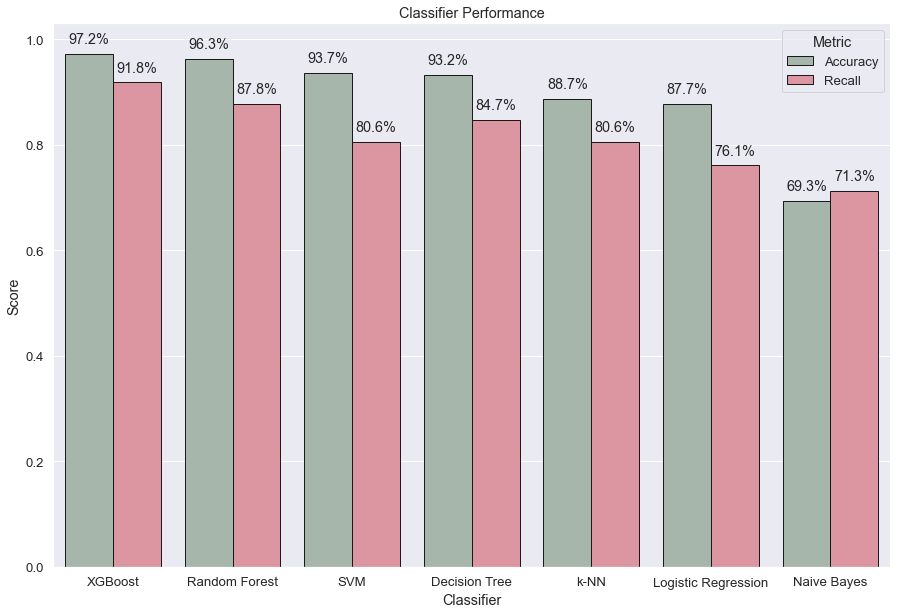

In [143]:
ax = sns.barplot(x = "Classifier", y = "Score", data = results, hue = "Metric", palette = ['#A3B9AA','#E68A99'], edgecolor = 'k',
                  order = ["XGBoost", "Random Forest", "SVM", "Decision Tree", "k-NN", "Logistic Regression", "Naive Bayes"], hue_order = ["Accuracy", "Recall"])
ax.set_ylabel('Score')
ax.figure.set_size_inches(15, 10)
ax.set_ylim(0,1.03)
ax.set_title('Classifier Performance')  
ax.figure.set_facecolor('None')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 0.02, '{0:.1%}'.format(height_l), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 0.02, '{0:.1%}'.format(height_r), ha="center")